<div style="position:relative; 
            color:#fff;
            display:grid;
            grid-template-columns: 1fr auto;
            align-items:center;
            border-radius:15px;
            background-color:#000;
            font-family:SF Pro Display, system-ui, sans-serif;
            letter-spacing:0px;
            padding-top:50px;
            padding-bottom:50px;
            padding-left:0px;
            padding-right:0;
            max-width:100%;
            overflow:hidden;
            ">

  <!-- Pseudo-elemento para imagem de fundo com opacidade reduzida -->
  <div style="content:''; 
              position:absolute;
              top:0;
              left:0;
              right:0;
              bottom:0;
              background-image:url('https://imgcdn.stablediffusionweb.com/2024/3/24/9b6dba8e-f87c-4838-9f9c-56c43ef3a459.jpg');
              background-size:cover;
              background-position:center;
              opacity:0.3;
              filter: blur(0px);
              z-index:1;"></div>

  <!-- Texto à esquerda -->
  <div style="position:relative; z-index:2; text-align:left; padding-left:50px">
    <p style="font-size:200%; font-weight:900; margin:0;">
      Support Vector Machine e o RMS Titanic
    </p>
    <p style="font-size:120%; font-weight:bold; margin-top:10px; margin-bottom:0; color:#fff">
      Exemplo Prático e Exercícios
    </p>
    <p style="font-size:100%; font-weight:normal; margin-top:10px; margin-bottom:0;color:#fff">
      Para a disciplina de Aprendizagem de Máquina - Prof. Sérgio Côrtes
    </p>
  </div>

</div>


Um dos conjuntos de dados públicos clássicos usados para demonstrar o Support Vector Machine (SVM) é o dataset "Titanic", que lista 891 dos passageiros a bordo do RMS Titanic quando ele foi atingido por um iceberg e afundou em sua viagem inaugural nas primeiras horas da madrugada de 15 de abril de 1912. 

O conjunto de dados inclui o nome de cada passageiro, bem como outras informações, como a classe da passagem, o preço da passagem, a idade e o gênero da pessoa, além de se essa pessoa sobreviveu ao naufrágio. Neste experimento, construiremos um modelo de classificação binária que prevê se um passageiro sobreviverá. Utilizaremos um classificador de Support Vector Machine (SVM) como base para o modelo.

### **Preparação do Ambiente**

O primeiro passo é carregar o conjunto de dados e prepará-lo para o treinamento de um modelo de aprendizado de máquina. Uma das razões pela qual o conjunto de dados Titanic é popular é que ele oferece uma ampla oportunidade para que cientistas de dados pratiquem suas habilidades de limpeza de dados.

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Determina se alguma coluna do conjunto de dados possui valores ausentes:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Filtra o conjunto de dados para remover as colunas que não serão utilizadas, aplica a codificação one-hot nas colunas "Sex" e "Pclass" e remove as linhas com valores ausentes:

In [8]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


O próximo passo é dividir os dados em dois conjuntos: um para treinamento e outro para teste. Usaremos uma divisão estratificada para criar uma distribuição balanceada de amostras nos conjuntos de treinamento e de teste:

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

<br>

### **Construir e treinar o modelo SVM**

Os SVMs frequentemente apresentam um melhor ajuste aos dados em comparação com classificadores que dependem de regressão logística. Vamos experimentar um classificador de vetor de suporte no mesmo conjunto de dados e ver se ele se sai melhor. Por padrão, a classe SVC do scikit-learn não fornece probabilidades, mas podemos ativá-las definindo o parâmetro probability como ```True```. Isso aumenta o tempo de treinamento, mas não é um problema aqui, já que o conjunto de dados é relativamente pequeno.

Na biblioteca **scikit-learn**, o módulo ```svm``` oferece classes como ```SVC``` para tarefas de classificação e ```SVR``` para tarefas de regressão. A classe SVC é especificamente projetada para tarefas de classificação utilizando o algoritmo SVM.

Neste primeiro exemplo, vamos treinar um modelo SVM sem nenhum kernel específico. Isso significa que o modelo usará um kernel RBF (Radial Basis Function) por padrão. Vamos treinar o modelo e avaliá-lo usando a métrica de acurácia.

In [10]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=0)
model.fit(x_train, y_train)

SVC(probability=True, random_state=0)

Obter uma pontuação de acurácia (accuracy):

In [11]:
model.score(x_test, y_test)

0.5944055944055944

O resultado não foi muito bom... Vamos experimentar um **kernel linear** para ver se o modelo apresenta um desempenho melhor:

In [12]:
model = SVC(kernel='linear', probability=True, random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8321678321678322

Após treinar o modelo SVM com kernel linear, avaliamos o desempenho no conjunto de teste (x_test, y_test) e obtivemos o valor de 0.8321 (ou 83,2%). Esse valor indica a acurácia do modelo no conjunto de teste, representando a proporção de previsões corretas em relação ao total de previsões feitas no conjunto de teste.

Vamos agora validar o modelo usando cinco folds de validação cruzada.

A validação cruzada é uma técnica que divide o conjunto de dados em k partes (folds) e treina o modelo k vezes, cada vez usando uma parte diferente como conjunto de teste. Isso é útil para avaliar a capacidade de generalização do modelo.

Vamos usar a função ```cross_val_score``` do scikit-learn para realizar a validação cruzada:

In [13]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model, x, y, cv=5)
print(scores['test_score'].mean())

0.7801339505564858


Aqui, aplicamos a validação cruzada (5-fold) ao modelo usando o conjunto completo de dados (```x``` e ```y```). A validação cruzada divide o conjunto de dados em 5 partes (ou dobras). 

Em cada rodada, 4 partes são usadas para treinamento e 1 para teste, alternando até que todas as dobras tenham sido usadas para teste.

Depois, calculamos a média das acurácias obtidas em cada uma das 5 dobras. O valor médio de 0.7801 (ou 78,0%) representa a acurácia média do modelo ao longo das dobras de validação cruzada.

**Por que obtivemos acurácias diferentes?**

A diferença entre essas acurácias sugere que, embora o modelo tenha uma boa performance no conjunto de teste, sua acurácia média em dados novos tende a ser mais próxima de 78,0% segundo a validação cruzada. A validação cruzada é uma maneira mais robusta de avaliar o modelo, especialmente se o conjunto de teste é relativamente pequeno ou se há variações nos dados.

<br>

### **Otimizar o modelo - Ajuste de Hiperparâmetros**

Conseguimos uma pontuação de 78% na validação cruzada usando um kernel linear, mas talvez possamos melhorar experimentando outros kernels com diferentes valores de ```C``` e ```γ``` (gamma). 

Vamos usar o **GridSearchCV** para ver se conseguimos aprimorar o modelo. Começaremos com valores de C e γ que variam de 0,1 a 10, utilizando três tipos diferentes de kernel: Linear, RBF e Sigmoide.

In [14]:
from sklearn.model_selection import GridSearchCV

model = SVC(probability=True, random_state=0)

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': [0.1, 0.5, 1, 5, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)

# Treina o modelo 75 vezes com 75 diferentes combinações de parâmetros
grid_search.fit(x, y) 

# Exibe o modelo com a melhor performance
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, k

Obtém os melhores valores de parâmetros do GridSearchCV:

In [15]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


Através do GridSearchCV, encontramos os melhores parâmetros para o modelo SVM com kernel RBF: C = 1 e γ = 0.5. 

Vamos aplicar estes novos parâmetros à validação cruzada e avaliar o desempenho médio:

In [16]:
scores = cross_validate(best_model, x, y, cv=5)
print(scores['test_score'].mean())

0.8179552841524671


Subimos de uma acurácia de 78% para quase 82% usando um kernel RBF e os parâmetros escolhidos pelo GridSearchCV. 

Vamos tentar reduzir o intervalo de valores dos parâmetros C e γ e ver se conseguimos melhorar ainda mais o modelo:

In [17]:
model = SVC(kernel='rbf', probability=True, random_state=0)

param_grid = {
    'C': [1, 2, 3],
    'gamma': [0.25, 0.5, 0.75]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x, y)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................................C=1, gamma=0.25; total time=   0.0s
[CV] END ....................................C=1, gamma=0.25; total time=   0.0s
[CV] END ....................................C=1, gamma=0.25; total time=   0.0s
[CV] END ....................................C=1, gamma=0.25; total time=   0.0s
[CV] END ....................................C=1, gamma=0.25; total time=   0.0s
[CV] END .....................................C=1, gamma=0.5; total time=   0.0s
[CV] END .....................................C=1, gamma=0.5; total time=   0.0s
[CV] END .....................................C=1, gamma=0.5; total time=   0.0s
[CV] END .....................................C=1, gamma=0.5; total time=   0.0s
[CV] END .....................................C=1, gamma=0.5; total time=   0.0s
[CV] END ....................................C=1, gamma=0.75; total time=   0.0s
[CV] END ....................................C=1,

In [18]:
print(grid_search.best_params_)

{'C': 3, 'gamma': 0.25}


Dessa vez, o GridSearchCV encontrou C = 3 e γ = 0.25 como os melhores parâmetros para o modelo SVM com kernel RBF. 

Vamos testar os novos parâmetros na validação cruzada:

In [19]:
scores = cross_validate(best_model, x, y, cv=5)
print(scores['test_score'].mean())

0.8221510883482714


Agora estamos com acurácia acima de 82%. 

Definiremos o melhor modelo encontrado pelo GridSearchCV como o modelo final:

In [20]:
model = best_model

<br>

### **Resultados**

Usaremos uma **Matriz de Confusão** para avaliar o desempenho do modelo durante o teste.

Uma matriz de confusão é uma tabela que mostra as frequências de classificação para cada classe do modelo. Cada linha da matriz representa as instâncias em uma classe prevista, enquanto cada coluna representa as instâncias em uma classe real (ou vice-versa).

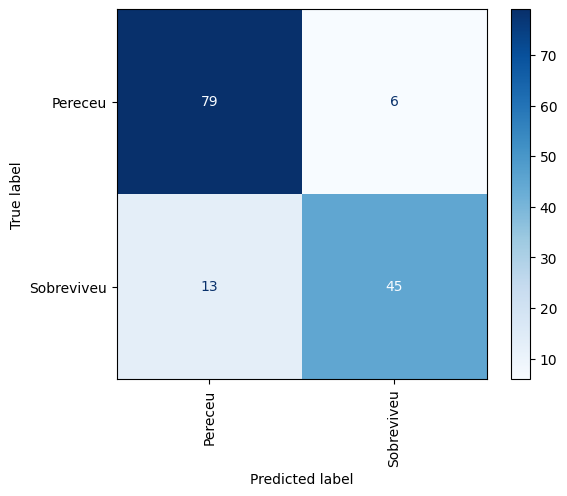

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, display_labels=['Pereceu', 'Sobreviveu'], cmap='Blues', xticks_rotation='vertical')
plt.show()

A Matriz de Confusão nos diz o seguinte:

1. **Verdadeiros Negativos (79)**: Esse número representa a quantidade de passageiros que realmente não sobreviveram e que o modelo previu corretamente como "Perceceu". Esse é um acerto do modelo na classe "Perceceu".

2. **Falsos Positivos (6)**: Esse número indica o total de passageiros que realmente não sobreviveram, mas que o modelo previu como "Sobreviveu". Esse é um erro do modelo, pois classificou incorretamente pessoas que não sobreviveram como sobreviventes.

3. **Falsos Negativos (13)**: Esse valor representa os passageiros que realmente sobreviveram, mas que o modelo previu incorretamente como "Perceceu". Esse é outro tipo de erro, onde o modelo falha ao identificar corretamente os sobreviventes.

4. **Verdadeiros Positivos (45)**: Esse número representa os passageiros que realmente sobreviveram e que o modelo previu corretamente como "Sobreviveu". Esse é um acerto do modelo na classe "Sobreviveu".

Vamos exibir o resultado da Classificação para avaliar outras métricas:

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        85
           1       0.88      0.78      0.83        58

    accuracy                           0.87       143
   macro avg       0.87      0.85      0.86       143
weighted avg       0.87      0.87      0.87       143



A tabela de resultados acima nos indica:

**Para a Classe 0 (Pereceu)**: 
- *Precision (Precisão):* 0.86 (ou 86%). A precisão indica aproporção de previsões corretas para a classe "Perceceu"entre todas as previsões feitas para essa classe. Ou seja,de todos os passageiros que o modelo previu como "Perceceu",86% realmente não sobreviveram.
- *Recall:* 0.93 (ou 93%). O recall para a classe "Perceceu" indica a proporção de passageiros que realmente não sobreviveram e foram corretamente classificados pelo modelo. Em outras palavras, o modelo conseguiu identificar corretamente 93% dos passageiros que realmente não sobreviveram.
- *F1-Score:* 0.89 (ou 89%).O F1-score é a média harmônica entre precisão e recall, proporcionando uma métrica equilibrada que considera ambos os aspectos. A pontuação de 89% sugere um bom equilíbrio entre a capacidade do modelo de prever corretamente os não sobreviventes e de evitar erros ao classificá-los.

**Para a Classe 1 (Sobreviveu)**:
- *Precision:* 0.88 (ou 88%). A precisão para a classe "Sobreviveu" indica que 88% das previsões de sobrevivência foram corretas. Ou seja, entre todos os passageiros que o modelo classificou como sobreviventes, 88% realmente sobreviveram.
- *Recall:* 0.78 (ou 78%). O recall para a classe "Sobreviveu" indica que o modelo conseguiu identificar corretamente 78% dos passageiros que realmente sobreviveram. Isso mostra uma certa tendência de o modelo classificar alguns sobreviventes como não sobreviventes (falsos negativos).
- *F1-Score:* 0.83 (ou 83%). Esse F1-score indica um bom equilíbrio para a classe "Sobreviveu", ainda que seja um pouco inferior ao da classe "Perceceu". A pontuação de 83% reflete a menor taxa de recall para essa classe.


**Métricas Gerais**

- *Acurácia:* 0.87 (ou 87%). A acurácia global é de 87%, o que significa que o modelo classificou corretamente 87% dos passageiros no conjunto de dados.
- *Macro Avg (Média Macro):*
    - Precisão Média: 0.87
    - Recall Médio: 0.85
    - F1-Score Médio: 0.86
    
    A média macro é a média simples entre as métricas das duas classes. Isso significa que cada classe tem igual peso, independentemente do seu tamanho. Essa métrica é útil quando se quer ver o desempenho do modelo considerando as duas classes igualmente.

- *Weighted Avg (Média Ponderada):*
    - Precisão Média Ponderada: 0.87
    - Revocação Média Ponderada: 0.87
    - F1-Score Ponderado: 0.87

    A média ponderada leva em conta o tamanho de cada classe ao calcular a média das métricas. Isso significa que a classe "Perceceu" tem um impacto ligeiramente maior nas médias, pois tem um número maior de exemplos (85) em comparação com "Sobreviveu" (58).

### **Usando o Modelo para fazer Previsões**

Agora, usaremos o modelo na prática para prever se uma mulher de 30 anos viajando em primeira classe sobreviveria à fatídica viagem do RMS Titanic:

In [29]:
female = [[30, 1, 0, 1, 0, 0]]
model.predict(female)[0]

1

No código ```female = [[30, 1, 0, 1, 0, 0]]```, cada valor dentro da lista representa uma característica específica da passageira, organizada de acordo com as variáveis usadas no modelo SVM. Abaixo está uma explicação de cada parâmetro:

-  ```30```: Idade (Age) - Representa que a passageira tem 30 anos.

- ```1```: Sexo (Sex) - Neste caso, o valor 1 representa que é uma mulher.

- ```0```: Número de irmãos/cônjuges a bordo (SibSp) - Representa que a passageira não está viajando com irmãos ou cônjuge.

- ```1```: Classe do ticket (Pclass) - Representa que a passageira está viajando na primeira classe. Geralmente, Pclass pode ser codificado como 1 (primeira classe), 2 (segunda classe) ou 3 (terceira classe).

- ```0```: Porto de embarque Embarked_C - Representa que a passageira não embarcou no porto C (Cherbourg). Este valor faz parte do One-Hot Encoding, onde cada porto é representado por uma coluna binária.

- ```0```: Porto de embarque Embarked_Q - Representa que a passageira não embarcou no porto Q (Queenstown). Este valor também é parte do One-Hot Encoding para a coluna Embarked.

Mais precisamente, qual é a probabilidade de que uma mulher de 30 anos viajando em primeira classe sobreviva?

In [30]:
probability = model.predict_proba(female)[0][1]
print(f'Probabilidade de sobrevivência: {probability:.1%}')

Probabilidade de sobrevivência: 84.1%


E quanto a um pobre homem de 60 anos viajando em terceira classe?

In [32]:
male = [[60, 0, 1, 0, 0, 1]]
probability = model.predict_proba(male)[0][1]
print(f'Probabilidade de sobrevivência: {probability:.1%}')

Probabilidade de sobrevivência: 13.0%


<br>


---

### **Exercícios**

1. **Experimente outros kernels do SVM, como o Sigmoide, e veja como eles se comparam ao kernel RBF.**
2. **Tente ajustar os hiperparâmetros C e γ manualmente para ver se consegue melhorar o desempenho do modelo.**
3. **Use o modelo para fazer previsões sobre outros passageiros, variando as características como idade, sexo e classe do ticket.**
4. **Experimente outros conjuntos de dados e veja como o SVM se comporta em diferentes cenários.**

<br>

---